<a href="https://colab.research.google.com/github/Abhishek92kumar/Aakash/blob/main/Gemini_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 3.5 MB/s eta 0:00:00


In [ ]:
import google.generativeai as genai
from google.colab import userdata


In [ ]:

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)



In [ ]:
# After calling the API key, let’s list the models.


for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [ ]:
model = genai.GenerativeModel('gemini-pro')


##Pass the question and generate content. Let’s see how much time is it taking.


In [ ]:
%%time
response = model.generate_content("What is Markov Chain Rule")

CPU times: user 153 ms, sys: 24.9 ms, total: 178 ms
Wall time: 11.8 s


###You’ll get the answer of your question, by just passing the question in the helper func

In [ ]:
# to_markdown(response.text)

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
response = model.generate_content("Explain Generative AI with 3 bullet points")
to_markdown(response.text)

BadRequest: 400 POST http://localhost:37441/v1beta/models/gemini-pro-vision:generateContent?%24alt=json%3Benum-encoding%3Dint: Add an image to use models/gemini-pro-vision, or switch your model to a text model.

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [ ]:
response.candidates

[content {
  parts {
    text: "- **Generates Novel Content:** Creates unique text, images, audio, or code not present in training data by understanding patterns and relationships.\n- **Learning-Based Approach:** Leverages machine learning algorithms to analyze vast datasets and extract knowledge, allowing for diverse and informed content generation.\n- **Context-Aware and Data-Driven:** Generates content that is relevant to the provided context or prompt, leveraging the data it has been trained on to produce cohesive and meaningful outputs."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [ ]:
%%time
response = model.generate_content("What is sparse vector?", stream=True)

CPU times: user 111 ms, sys: 10.8 ms, total: 122 ms
Wall time: 7.83 s


In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

A sparse vector is a data structure representing a vector with a large number of zero
________________________________________________________________________________
 entries. Sparse vectors are used to efficiently represent vectors where most of the elements are zero.

In a dense vector, all of the elements are stored explicitly,
________________________________________________________________________________
 even if they are zero. This can be inefficient if most of the elements are zero, as it wastes space and time to store and access the zero elements.

A sparse vector, on the other hand, only stores the non-zero elements. Each non-zero element is stored as a pair consisting of the index
________________________________________________________________________________
 of the element and its value. This saves space and time, as the zero elements do not need to be stored or accessed.

Sparse vectors are often used in machine learning and data mining, where it is common to have vecto

In [ ]:
response = model.generate_content("What is sparse vector?", stream=True)
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Generate text from image and text inputs
Let’s see what the model could do with the image inputs.

Load the image.



In [ ]:
!curl -o image.jpg https://i.pinimg.com/736x/d0/0b/f8/d00bf86933543a764c971cca785fdc32.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 82583  100 82583    0     0   258k      0 --:--:-- --:--:-- --:--:--  259k


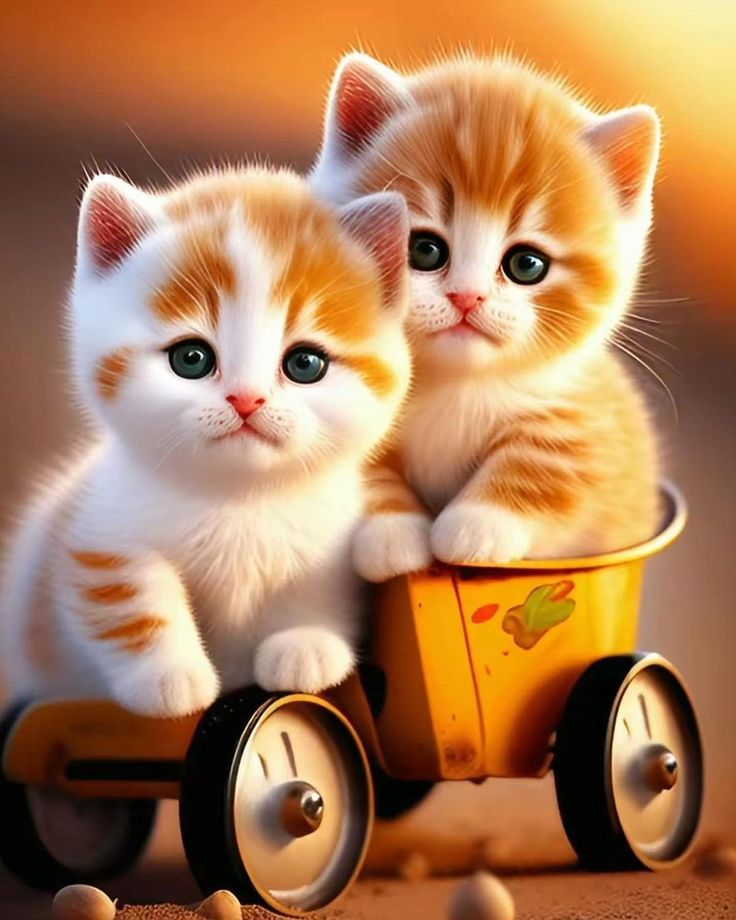

In [ ]:
img = PIL.Image.open('image.jpg')
img

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')
# Let’s generate the content from the image inputs.

response = model.generate_content(img)

to_markdown(response.text)


NameError: name 'Markdown' is not defined

In [ ]:
response = model.generate_content(["Write a short, engaging blog post based on this picture.It should include the description about how cats are friendly with human beings for being pet.", img], stream=True)
response.resolve()
to_markdown(response.text)

>  ## **Cats are Friendly with Human Beings for Being Pet**
> 
> Cats are one of the most popular pets in the world, and for good reason. They are loving, affectionate, and always up for a good cuddle. But did you know that cats are also very friendly with human beings?
> 
> That's right, cats actually enjoy being petted by humans. In fact, a study by the University of California, Berkeley found that cats release oxytocin when they are petted, which is the same hormone that is released when we bond with other people.
> 
> So, if you're looking for a furry friend who will love you unconditionally, a cat is the perfect pet for you. Not only will they make you laugh and smile, but they'll also help you to relax and de-stress.
> 
> Here are a few tips for petting a cat:
> 
> * Start by petting the cat on the head or neck. These are areas that cats typically enjoy being touched.
> * Use a light touch and avoid petting the cat too hard.
> * Pay attention to the cat's body language. If the cat starts to pull away or swat at you, it's time to stop petting it.
> 
> With a little practice, you'll be able to pet your cat like a pro!

In [ ]:
# Let’s initiate the conversation:

model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat
# Let’s pass the first question.

response = chat.send_message("In one sentence, explain the big bang theory for a 8 year old child.")
to_markdown(response.text)

> Imagine that everything in the universe started as a tiny, hot ball that suddenly exploded, creating all the stars, planets, and everything else we see around us.

#Pass the second question.

In [ ]:
response = chat.send_message("In one sentence, explain the solar system for a 8 year old child.")
to_markdown(response.text)


> Our solar system is like a giant family of planets, with the Sun as the mom and the planets, including our Earth, as her children, all orbiting around her.

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain the big bang theory for a 8 year old child."
 }
 role: "user",
 parts {
   text: "Imagine that everything in the universe started as a tiny, hot ball that suddenly exploded, creating all the stars, planets, and everything else we see around us."
 }
 role: "model",
 parts {
   text: "In one sentence, explain the solar system for a 8 year old child."
 }
 role: "user",
 parts {
   text: "Our solar system is like a giant family of planets, with the Sun as the mom and the planets, including our Earth, as her children, all orbiting around her."
 }
 role: "model"]

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

**Solar System:**

Our solar system consists of the Sun, eight planets,
________________________________________________________________________________
 dwarf planets, moons, asteroids, comets, and meteoroids. The Sun is a star, a giant ball of hot, glowing gases that radiates energy.
________________________________________________________________________________
 The planets are celestial bodies that orbit the Sun. The inner planets, Mercury, Venus, Earth, and Mars, are made mostly of rock and metal. The outer planets, Jupiter, Saturn, Uranus, and Neptune, are gas giants, composed mostly of hydrogen and helium. Dwarf planets are smaller than planets but larger than
________________________________________________________________________________
 asteroids. Moons are natural satellites that orbit planets. Asteroids are rocky bodies smaller than planets but larger than meteoroids. Comets are icy bodies that have a tail of gas and dust that becomes visible when they approach the Sun. M

In [ ]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain the big bang theory for a 8 year old child.

> **model**: Imagine that everything in the universe started as a tiny, hot ball that suddenly exploded, creating all the stars, planets, and everything else we see around us.

> **user**: In one sentence, explain the solar system for a 8 year old child.

> **model**: Our solar system is like a giant family of planets, with the Sun as the mom and the planets, including our Earth, as her children, all orbiting around her.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: **Solar System:**
> 
> Our solar system consists of the Sun, eight planets, dwarf planets, moons, asteroids, comets, and meteoroids. The Sun is a star, a giant ball of hot, glowing gases that radiates energy. The planets are celestial bodies that orbit the Sun. The inner planets, Mercury, Venus, Earth, and Mars, are made mostly of rock and metal. The outer planets, Jupiter, Saturn, Uranus, and Neptune, are gas giants, composed mostly of hydrogen and helium. Dwarf planets are smaller than planets but larger than asteroids. Moons are natural satellites that orbit planets. Asteroids are rocky bodies smaller than planets but larger than meteoroids. Comets are icy bodies that have a tail of gas and dust that becomes visible when they approach the Sun. Meteoroids are small pieces of debris that range in size from dust grains to small asteroids.
> 
> **Formation of the Solar System:**
> 
> The solar system formed about 4.6 billion years ago from the collapse of a giant molecular cloud. As the cloud collapsed, it began to spin and flatten into a disk. The Sun formed at the center of the disk, and the planets formed from the remaining gas and dust. The inner planets formed first, followed by the outer planets. Over time, the planets cleared their orbits of most of the remaining debris, leaving behind the asteroids, comets, and meteoroids that we see today.

#
Lets Work on our area of interest

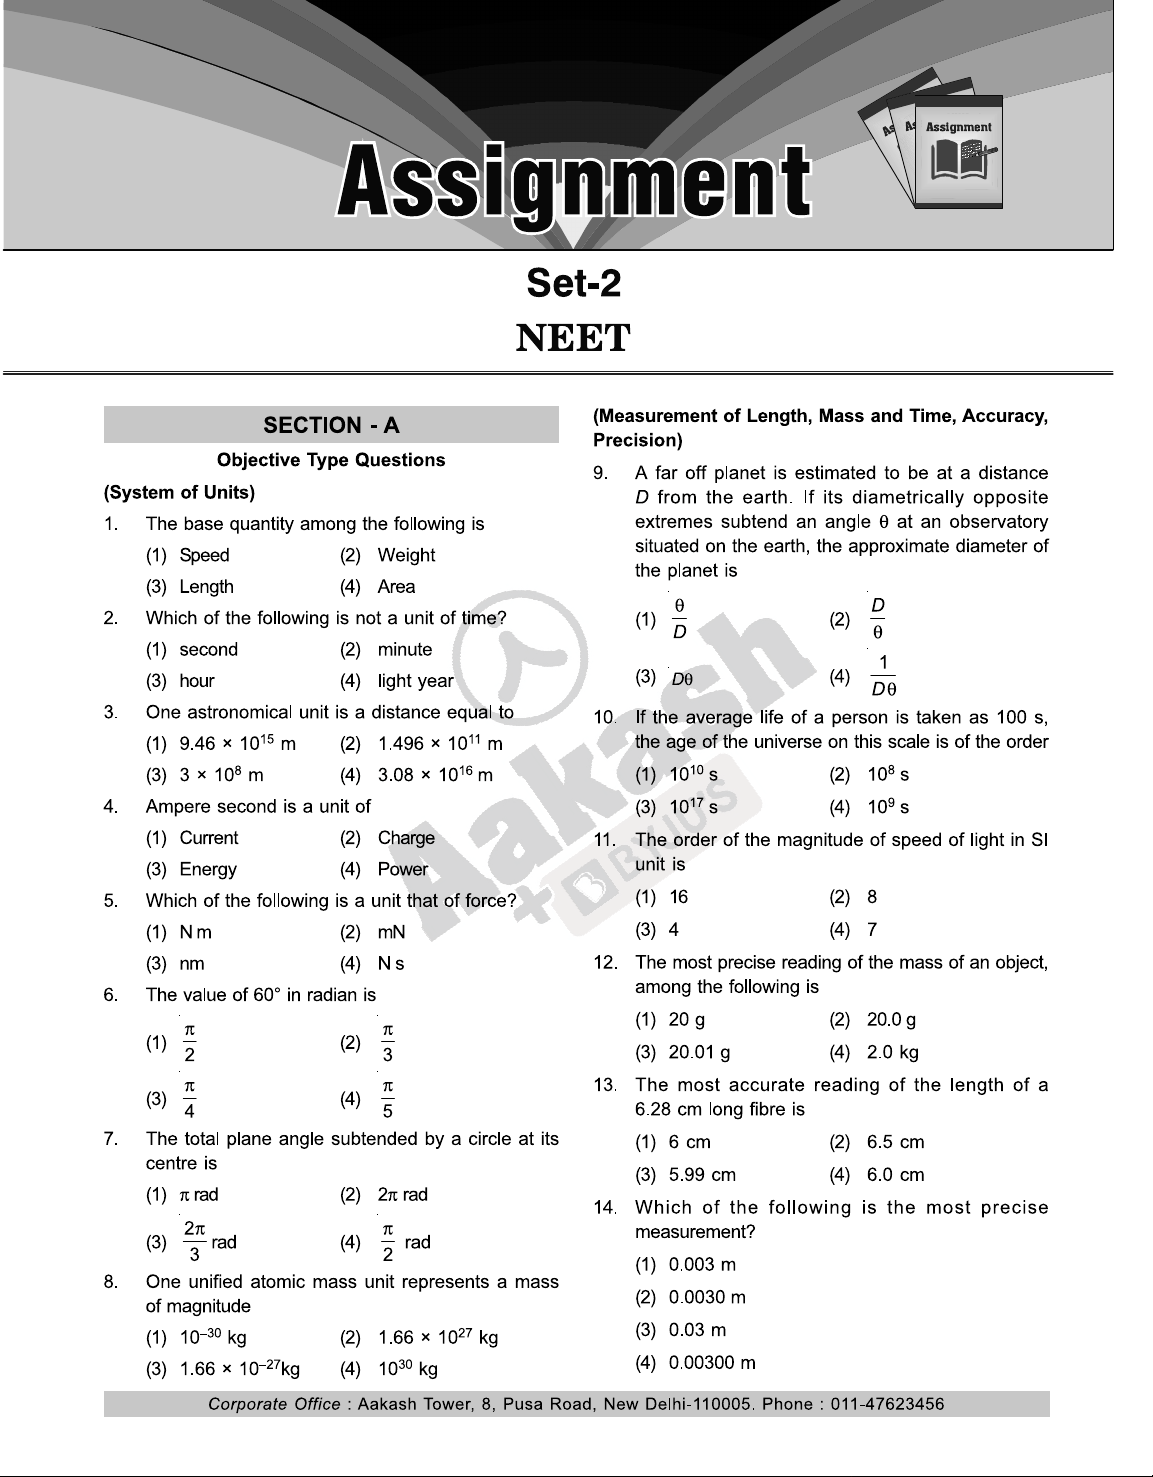

In [ ]:
# Import necessary libraries
import cv2
import PIL.Image

# Read the image
# image = cv2.imread('/content/M-XI_23-24_PHY_C2_Units and Measurements52.png')
image = PIL.Image.open('M-XI_23-24_PHY_C2_Units and Measurements52.png')
image

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')
# Let’s generate the content from the image inputs.

response = model.generate_content(image)


to_markdown(response.text)


NameError: name 'Markdown' is not defined

In [ ]:
response = model.generate_content(["Give me get the outputs as paragraph which contains questions present in this page along with the options", image], stream=True)
response.resolve()
to_markdown(response.text)

#Trying to improve the output

In [ ]:
!pip install -q -U google-generativeai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
import google.generativeai as genai

genai.configure(api_key=GOOGLE_API_KEY)

# import genai
import PIL
import os
import re
model = genai.GenerativeModel('gemini-pro-vision')


# ... (your existing code for API setup)

def extract_questions_and_format_exponents(image_path):
    image = PIL.Image.open(image_path)
    response = model.generate_content(["Give me the outputs as paragraphs containing questions present in this page along with the options", image], stream=False)
    response.resolve()
    text = response.text

    # Format exponents using a regular expression
    formatted_text = re.sub(r"(\d+)(\s+)x(\s+)10(\d+)", r"\1 x 10^\4", text)  # Ensure spacing around "x"

    # Extract questions (adapt based on output structure)
    questions = []
    for paragraph in formatted_text.split("\n\n"):
        if "?" in paragraph:
            questions.append(paragraph.strip())

    return questions

# Path to the folder containing images
image_folder = "/content/"

# Iterate through images and extract questions
for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        image_path = os.path.join(image_folder, filename)
        try:
            questions = extract_questions_and_format_exponents(image_path)
            print(f"Questions for {filename}:")
            for question in questions:
                print(question)
        except Exception as e:
            print(f"Error processing {filename}: {e}")


Questions for M-XI_23-24_PHY_C2_Units and Measurements52.png:
2. Which of the following is not a unit of time?
(1) second
(2) minute
(3) hour
(4) light year
5. Which of the following is a unit of force?
(1) N
(2) Ns
(3) Nm
(4) N/m
14. Which of the following is the most precise measurement?
(1) 0.2 m
(2) 0.003 m
(3) 0.0030 m
(4) 0.00300 m


##After realising that its even worse. Returning back to the previous code

In [ ]:
!pip install -q -U google-generativeai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
import google.generativeai as genai

genai.configure(api_key=GOOGLE_API_KEY)

# import genai
import PIL
import os
import re
model = genai.GenerativeModel('gemini-pro-vision')


# ... (your existing code for API setup)

def extract_questions_and_format_exponents(image_path):
    image = PIL.Image.open(image_path)
    response = model.generate_content(["Give me the outputs as paragraphs containing questions present in this page along with the options", image], stream=False)
    response.resolve()
    text = response.text

    # Format exponents using a regular expression
    # formatted_text = re.sub(r"(\d+)(\s+)x(\s+)10(\d+)", r"\1 x 10^\4", text)  # Ensure spacing around "x"

    # Extract questions (adapt based on output structure)
    questions = []
    # for paragraph in formatted_text.split("\n\n"):
    #     if "?" in paragraph:
    #         questions.append(paragraph.strip())

    return questions

# Path to the folder containing images
image_folder = "/content/"

# Iterate through images and extract questions
for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        image_path = os.path.join(image_folder, filename)
        try:
            questions = extract_questions_and_format_exponents(image_path)
            print(f"Questions for {filename}:")
            for question in questions:
                print(question)
        except Exception as e:
            print(f"Error processing {filename}: {e}")


Questions for M-XI_23-24_PHY_C2_Units and Measurements52.png:


###New Try just keeping it simple and looping for all the images

In [ ]:
!pip install -q -U google-generativeai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
import google.generativeai as genai

genai.configure(api_key=GOOGLE_API_KEY)

# import genai
import PIL
import textwrap


from IPython.display import Markdown

model = genai.GenerativeModel('gemini-pro-vision')

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))



# Let’s generate the content from the image inputs.


image = PIL.Image.open('/content/M-XI_23-24_PHY_C2_Units and Measurements52.png')

response = model.generate_content(["Give me get the outputs as paragraph which contains questions present in this page along with the options", image], stream=True)
response.resolve()
to_markdown(response.text)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 2.8 MB/s eta 0:00:00


>  1. The base quantity among the following is
> (1) Speed
> (2) Weight
> (3) Length
> (4) Area
> 
> 2. Which of the following is not a unit of time?
> (1) second
> (2) minute
> (3) hour
> (4) light year
> 
> 3. One astronomical unit is a distance equal to
> (1) 3 x 108 m
> (2) 3 x 1016 m
> (3) 9.46 x 1012 m
> (4) 1.496 x 1011 m
> 
> 4. Ampere second is a unit of
> (1) Energy
> (2) Power
> (3) Current
> (4) Charge
> 
> 5. Which of the following is a unit of force?
> (1) N
> (2) Ns
> (3) Nm
> (4) J
> 
> 6. The value of 60o in radian is
> (1) π/3
> (2) π/4
> (3) π/5
> (4) π/6
> 
> 7. The total plane angle subtended by a circle at its centre is
> (1) rad
> (2) 2π rad
> (3) π/2 rad
> (4) π rad
> 
> 8. One unified atomic mass unit represents a mass of
> (1) 10-30 kg
> (2) 1.66 x 10-27 kg
> (3) 1.66 x 10-24 kg
> (4) 10-27 kg
> 
> 9. A far off planet is estimated to be at a distance D from the earth. If its diametrically opposite extremes subtend an angle θ at an observatory situated on the earth, the approximate diameter of the planet is
> (1) Dθ
> (2) D/θ
> (3) D tan θ
> (4) D sec θ
> 
> 10. If the average life of a person is taken as 100 s, the age of the universe on this scale is of the order of
> (1) 1010 s
> (2) 1015 s
> (3) 107 s
> (4) 104 s
> 
> 11. The order of the magnitude of speed of light in SI is
> (1) 16
> (2) 8
> (3) 4
> (4) 2
> 
> 12. The most precise reading of the mass of an object, among the following is
> (1) 20.0 g
> (2) 20.00 g
> (3) 20.000 g
> (4) 20.0000 g
> 
> 13. The most accurate reading of the length of a pencil is
> (1) 6 cm
> (2) 6.5 cm
> (3) 5.99 cm
> (4) 6.0 cm
> 
> 14. Which of the following is the most precise measurement?
> (1) 0.2 m
> (2) 0.003 m
> (3) 0.0030 m
> (4) 0.00300 m

In [ ]:
# Testing
import http.client
import typing
import urllib.request
from vertexai.generative_models import GenerativeModel, Image

# create helper function
def load_image_from_url(image_url: str) -> Image:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return Image.from_bytes(image_bytes)

# Load images from Cloud Storage URI
landmark1 = load_image_from_url(
    "https://storage.googleapis.com/cloud-samples-data/vertex-ai/llm/prompts/landmark1.png"
)
landmark2 = load_image_from_url(
    "https://storage.googleapis.com/cloud-samples-data/vertex-ai/llm/prompts/landmark2.png"
)
landmark3 = load_image_from_url(
    "https://storage.googleapis.com/cloud-samples-data/vertex-ai/llm/prompts/landmark3.png"
)

# Pass multimodal prompt

model = genai.GenerativeModel("gemini-1.0-pro-vision")
# response = model.generate_content("Explain Generative AI with 3 bullet points")

response = model.generate_content(
    [
        landmark1,
        "city: Rome, Landmark: the Colosseum",
        landmark2,
        "city: Beijing, Landmark: Forbidden City",
        landmark3,
    ]
)
print(response)

TypeError: Could not create `Blob`, expected `Blob`, `dict` or an `Image` type(`PIL.Image.Image` or `IPython.display.Image`).
Got a: <class 'vertexai.generative_models._generative_models.Image'>
Value: <vertexai.generative_models._generative_models.Image object at 0x7f46a5197130>

In [ ]:
import os
from PIL import Image
import openpyxl

# Assuming you have other libraries (textwrap, Markdown) installed, skip their installation steps.

def extract_questions(image_path):
    # Replace this with your logic to extract questions and options from the image.
    # You can use OCR libraries or manual extraction.
    questions = []

    return questions

def write_to_excel(data, filename):
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.cell(row=1, column=1).value = "Question"


    row_index = 2
    for question in data:
        ws.cell(row=row_index, column=1).value = question
        row_index += 1

    wb.save(filename)


In [ ]:
# Latest try after lunch
import os
from PIL import Image
import openpyxl

# Assuming you have other libraries (textwrap, Markdown) installed, skip their installation steps.

def extract_questions(image_path, model):
    # Replace this with your actual Generative AI code using google.generativeai
    # This is just an example structure.
    response = model.generate_content(["Give me get the outputs as paragraph which contains questions present in this page along with the options"], image=image_path, stream=True)
    response.resolve()
    return response.text

def write_to_excel(data, filename):
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.cell(row=1, column=1).value = "Generated Text"

    row_index = 2
    for text in data:
        ws.cell(row=row_index, column=1).value = text
        row_index += 1

    wb.save(filename)

# Define directory containing your images
image_dir = "/content/"

# Define output Excel filename
output_file = "extracted_questions.xlsx"

# Initialize empty list to store extracted data
extracted_data = []

# Access your Generative AI model (replace with your actual setup)
# Assuming you have configured the API key and imported necessary modules.
model = genai.GenerativeModel('gemini-pro-vision')


import os
from PIL import Image
import openpyxl
import textwrap

def to_markdown(text):
    text = text.replace('•', '  *')  # Adjust formatting as needed
    return textwrap.indent(text, '> ')  # Simplified for direct text output

def extract_questions(image_path, model):
    prompt = "Give me get the outputs as paragraph which contains questions present in this page along with the options"
    response = model.generate_content([prompt], image=image_path, stream=True)  # Use the prompt here
    response.resolve()
    return to_markdown(response.text)  # Apply Markdown formatting

# ... (rest of the code remains the same)














# Loop through image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):  # Adjust for your image format
        image_path = os.path.join(image_dir, filename)
        text = extract_questions(image_path, model)
        extracted_data.append(text)

# Write extracted data to Excel file
write_to_excel(extracted_data, output_file)

print(f"Results exported to '{output_file}'")


In [ ]:
!pip install -q -U google-generativeai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
import google.generativeai as genai

genai.configure(api_key=GOOGLE_API_KEY)

from IPython.display import Markdown

model = genai.GenerativeModel('gemini-pro-vision')

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))






import os
from PIL import Image
import openpyxl
import textwrap

# Assuming you have other libraries (textwrap, Markdown) installed, skip their installation steps.

def to_markdown(text):
    text = text.replace('•', '  *')  # Adjust formatting as needed
    return textwrap.indent(text, '> ')  # Simplified for direct text output

def extract_questions(image_path, model):
    prompt = "Give me get the outputs as paragraph which contains questions present in this page along with the options. Also take care of the exponent and fraction"
    response = model.generate_content([prompt], image=image_path, stream=True)  # Use the prompt here
    # response = model.generate_content(["Give me get the outputs as paragraph which contains questions present in this page along with the options", image], stream=True)


    response.resolve()
    return to_markdown(response.text)  # Apply Markdown formatting

def write_to_excel(data, filename):
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.cell(row=1, column=1).value = "Generated Text"

    row_index = 2
    for text in data:
        ws.cell(row=index, column=1).value = text
        row_index += 1

    wb.save(filename)

# Define directory containing your images
image_dir = "/content/"

# Define output Excel filename
output_file = "extracted_questions.xlsx"

# Initialize empty list to store extracted data
extracted_data = []

# Access your Generative AI model (replace with your actual setup)
# Assuming you have configured the API key and imported necessary modules.
model = genai.GenerativeModel('gemini-pro-vision')

# Loop through image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):  # Adjust for your image format
        image_path = os.path.join(image_dir, filename)
        text = extract_questions(image_path, model)
        extracted_data.append(text)

# Write extracted data to Excel file
write_to_excel(extracted_data, output_file)

print(f"Results exported to '{output_file}'")


TypeError: GenerativeModel.generate_content() got an unexpected keyword argument 'image'

In [7]:
!pip install -q -U google-generativeai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
import google.generativeai as genai

genai.configure(api_key=GOOGLE_API_KEY)

from IPython.display import Markdown

model = genai.GenerativeModel('gemini-pro-vision')

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

import os
from PIL import Image
import openpyxl
import textwrap

# Assuming you have other libraries (textwrap, Markdown) installed, skip their installation steps.

def to_markdown(text):
    text = text.replace('•', '  *')  # Adjust formatting as needed
    return textwrap.indent(text, '> ')  # Simplified for direct text output

def extract_questions(image_path, model):
    prompt = "Give me get the outputs as paragraph which contains questions present in this page along with the options. Also take care of the exponent and fraction"
    # response = model.generate_content([prompt], image=image_path, stream=True)  # Use the prompt here
    response = model.generate_content(["Give me get the outputs as paragraph which contains questions present in this page along with the options"], image_path, stream=True)
    response.resolve()
    return to_markdown(response.text)  # Apply Markdown formatting

def write_to_excel(data, filename):
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.cell(row=1, column=1).value = "Generated Text"

    row_index = 2
    # index = 2
    for text in data:
        ws.cell(row=row_index, column=1).value = text
        row_index += 1

    wb.save(filename)

# Define directory containing your images
image_dir = "/content/"

# Define output Excel filename
output_file = "extracted_questions.xlsx"

# Initialize empty list to store extracted data
extracted_data = []

# Access your Generative AI model (replace with your actual setup)
# Assuming you have configured the API key and imported necessary modules.
model = genai.GenerativeModel('gemini-pro-vision')

# Loop through image files in the directory




# for index in os.listdir(image_dir):
#     if index.endswith(".png"):  # Adjust for your image format
#         image_path = os.path.join(image_dir, index)
#         text = extract_questions(image_path, model)
#         extracted_data.append(text)



for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(image_dir, filename)
        text = extract_questions(image_path, model)
        extracted_data.append(text)

# Write extracted data to Excel file
write_to_excel(extracted_data, output_file)

print(f"Results exported to '{output_file}'")


TypeError: GenerativeModel.generate_content() takes 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [5]:
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):  # Adjust for your image format
        image_path = os.path.join(image_dir, filename)
        # text = extract_questions(image_path, model)
        # extracted_data.append(text)


In [6]:
filename

'sample_data'

In [ ]:
extracted_data

['>  1. The base quantity among the following is\n> (1) Speed\n> (2) Weight\n> (3) Length\n> (4) Area\n\n> 2. Which of the following is not a unit of time?\n> (1) second\n> (2) minute\n> (3) hour\n> (4) light year\n\n> 3. One astronomical unit is a distance equal to\n> (1) 3 x 108 m\n> (2) 3 x 1016 m\n> (3) 9.46 x 1012 m\n> (4) 3.08 x 1016 m\n\n> 4. Ampere second is a unit of\n> (1) Energy\n> (2) Power\n> (3) Current\n> (4) Charge\n\n> 5. Which of the following is a unit of force?\n> (1) N\n> (2) Ns\n> (3) Nm\n> (4) J\n\n> 6. The value of 60o in radian is\n> (1) π/3\n> (2) π/4\n> (3) π/5\n> (4) π/6\n\n> 7. The total plane angle subtended by a circle at its centre is\n> (1) 2π rad\n> (2) π rad\n> (3) 4π rad\n> (4) 6π rad\n\n> 8. One unified atomic mass unit represents a mass of\n> (1) 10-30 kg\n> (2) 1.66 x 10-27 kg\n> (3) 1.66 x 10-24 kg\n> (4) 1.66 x 10-19 kg\n\n> 9. A far off planet is estimated to be at a distance D from the earth. If its diametrically opposite extremes subtend an a

In [ ]:

for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(image_dir, filename)
        text = extract_questions(image_path, model)
        extracted_data.append(text)


In [ ]:
extracted_data

['>  1. The base quantity among the following is\n> (1) Speed\n> (2) Weight\n> (3) Length\n> (4) Area\n\n> 2. Which of the following is not a unit of time?\n> (1) second\n> (2) minute\n> (3) hour\n> (4) light year\n\n> 3. One astronomical unit is a distance equal to\n> (1) 3 x 108 m\n> (2) 3 x 1016 m\n> (3) 9.46 x 1012 m\n> (4) 3.08 x 1016 m\n\n> 4. Ampere second is a unit of\n> (1) Energy\n> (2) Power\n> (3) Current\n> (4) Charge\n\n> 5. Which of the following is a unit of force?\n> (1) N\n> (2) Ns\n> (3) Nm\n> (4) J\n\n> 6. The value of 60o in radian is\n> (1) π/3\n> (2) π/4\n> (3) π/5\n> (4) π/6\n\n> 7. The total plane angle subtended by a circle at its centre is\n> (1) 2π rad\n> (2) π rad\n> (3) 4π rad\n> (4) 6π rad\n\n> 8. One unified atomic mass unit represents a mass of\n> (1) 10-30 kg\n> (2) 1.66 x 10-27 kg\n> (3) 1.66 x 10-24 kg\n> (4) 1.66 x 10-19 kg\n\n> 9. A far off planet is estimated to be at a distance D from the earth. If its diametrically opposite extremes subtend an a

In [15]:
!pip install -q -U google-generativeai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
import google.generativeai as genai

# import genai
import PIL
import os
from google.colab import userdata
import openpyxl
import textwrap

def extract_questions(image_path, model):
    """
    Extracts questions from the given image using the provided model.

    Args:
        image_path: Path to the image file.
        model: The GenerativeModel instance to use for content generation.

    Returns:
        The extracted and formatted questions as a string.
    """

    prompt = "Give me the outputs as a paragraph which contains questions present in this page along with the options, taking care of exponents and fractions."
    response = model.generate_content(prompt, image_path, stream=True)
    response.resolve()
    text = response.text

    # Improved formatting (optional)
    formatted_text = textwrap.fill(text, width=80)  # Wrap text for better readability

    return formatted_text

def write_to_excel(data, filename):
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.cell(row=1, column=1).value = "Generated Text"

    row_index = 2
    for entry in data:
        ws.cell(row=row_index, column=1).value = entry
        row_index += 1

    wb.save(filename)

# Access API key securely
GOOGLE_API_KEY = userdata.get("GOOGLE_API_KEY")

# Configure API key (error handling optional)
try:
    genai.configure(api_key=GOOGLE_API_KEY)
except Exception as e:
    print(f"Error configuring API key: {e}")
    exit(1)

# Define directory containing your images
image_dir = "/content/"

# Define output Excel filename
output_file = "extracted_questions.xlsx"

# Initialize empty list to store extracted data
extracted_data = []

model = genai.GenerativeModel('gemini-pro-vision')

# Loop through image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(image_dir, filename)
        extracted_text = extract_questions(image_path, model)
        extracted_data.append(extracted_text)

# Write extracted data to Excel file
write_to_excel(extracted_data, output_file)

print(f"Results exported to '{output_file}'")


TypeError: GenerativeModel.generate_content() takes 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [26]:
!pip install -q -U google-generativeai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
import google.generativeai as genai

# import genai
import PIL
import os
from google.colab import userdata
import openpyxl
import textwrap

def extract_questions(image_path, model):
  """
  Extracts questions from the given image using the provided model.

  Args:
        image_path: Path to the image file.
       model: The GenerativeModel instance to use for content generation.

  Returns:
        The extracted and formatted questions as a string.
  """

  prompt = "Give me the outputs as a paragraph which contains questions present in this page along with the options, taking care of exponents and fractions."
  image = PIL.Image.open(image_path)

  response = model.generate_content(prompt, image, stream=True)
  response.resolve()
  text = response.text

    # Improved formatting (optional)
  formatted_text = textwrap.fill(text, width=80)  # Wrap text for better readability

  return formatted_text


def write_to_excel(data, filename):
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.cell(row=1, column=1).value = "Generated Text"

    row_index = 2
    for entry in data:
        ws.cell(row=row_index, column=1).value = entry
        row_index += 1

    wb.save(filename)

# Access API key securely
GOOGLE_API_KEY = userdata.get("GOOGLE_API_KEY")

# Configure API key (error handling optional)
try:
    genai.configure(api_key=GOOGLE_API_KEY)
except Exception as e:
    print(f"Error configuring API key: {e}")
    exit(1)

# Define directory containing your images
image_dir = "/content/"

# Define output Excel filename
output_file = "extracted_questions.xlsx"

# Initialize empty list to store extracted data
extracted_data = []

model = genai.GenerativeModel('gemini-pro-vision')

# Loop through image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(image_dir, filename)
        extracted_text = extract_questions(image_path, model)
        extracted_data.append(extracted_text)

# Write extracted data to Excel file
write_to_excel(extracted_data, output_file)

print(f"Results exported to '{output_file}'")


TypeError: GenerativeModel.generate_content() takes 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [23]:
image_path

'/content/M-XI_23-24_PHY_C2_Units and Measurements53.png'

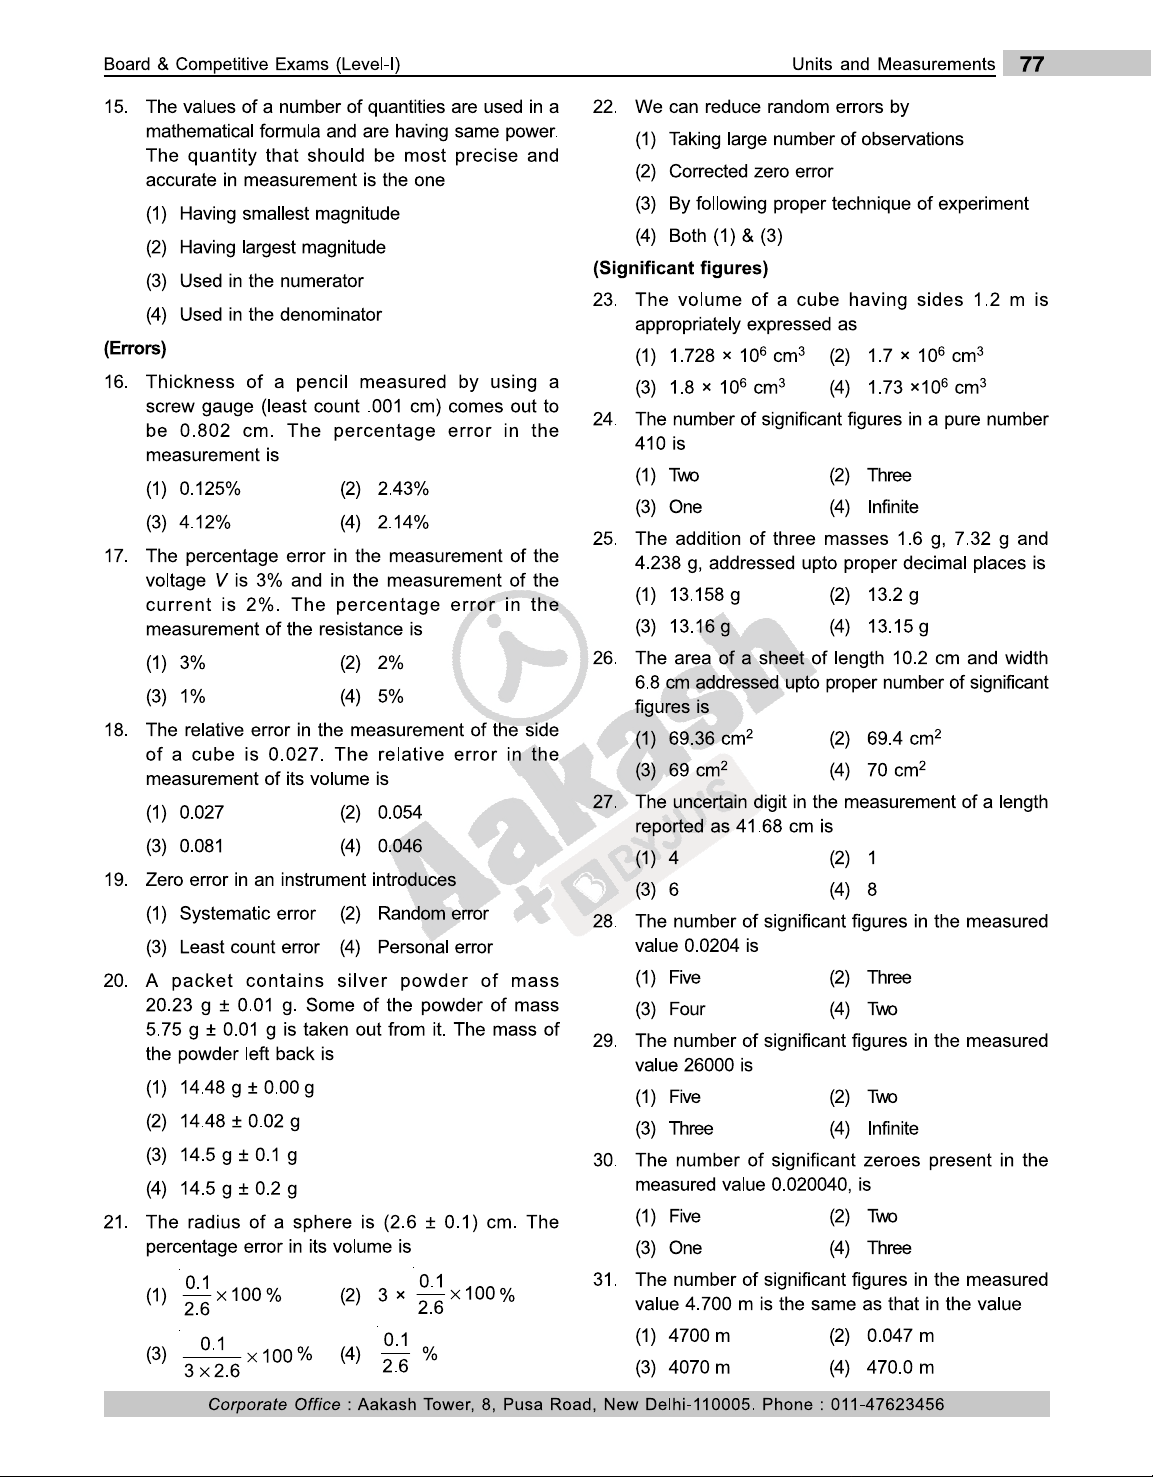

In [25]:
image = PIL.Image.open(image_path)
image

In [30]:
!pip install -q -U google-generativeai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
import google.generativeai as genai

genai.configure(api_key=GOOGLE_API_KEY)

# import genai
import PIL
import textwrap
import os
import openpyxl


from IPython.display import Markdown

model = genai.GenerativeModel('gemini-pro-vision')

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))



# Let’s generate the content from the image inputs.


# image = PIL.Image.open('/content/M-XI_23-24_PHY_C2_Units and Measurements52.png')

# response = model.generate_content(["Give me get the outputs as paragraph which contains questions present in this page along with the options", image], stream=True)
# response.resolve()
# to_markdown(response.text)







# Define directory containing your images
image_dir = "/content/"

# Define output Excel filename
output_file = "extracted_questions.xlsx"

# Initialize empty list to store extracted data
extracted_data = []

model = genai.GenerativeModel('gemini-pro-vision')

# Loop through image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(image_dir, filename)

        image = PIL.Image.open(image_path)

        response = model.generate_content(["Give me get the outputs as paragraph which contains questions present in this page along with the options", image], stream=True)
        response.resolve()
        text = response.text

        formatted_text = textwrap.fill(text, width=80)  # Wrap text for better readability




        extracted_data.append(formatted_text)

# Write extracted data to Excel file
write_to_excel(extracted_data, output_file)

print(f"Results exported to '{output_file}'")


Results exported to 'extracted_questions.xlsx'


In [28]:
extracted_data

[<IPython.core.display.Markdown object>,
 <IPython.core.display.Markdown object>]